In [453]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [454]:
import random
def randomseq(n, m):
    return [random.randint(-m, m)  for i in range(0, n)] #* (3 if i < n/2 else 3)

In [455]:
inp = randomseq(300, 20) #[11, 1, 7, 3, 0, 35, 10, 2, 1, 10, 11, 11, 2, 30, 80, 1, 50, 70, 90, 12, 50, 21, 10, 50, 5, 1, 2, 88, 10, 50, 2, 12, 3, 1, 2, 12]
T = 300

In [456]:
inp

[-18,
 11,
 -17,
 -4,
 -8,
 16,
 20,
 11,
 2,
 18,
 9,
 2,
 5,
 17,
 -12,
 14,
 1,
 8,
 20,
 -15,
 -5,
 -5,
 5,
 5,
 -12,
 17,
 -3,
 -2,
 14,
 6,
 -7,
 -4,
 13,
 -20,
 14,
 -13,
 -10,
 -16,
 -20,
 1,
 10,
 -15,
 -16,
 13,
 9,
 -20,
 -18,
 -2,
 12,
 -17,
 18,
 -14,
 -7,
 18,
 -2,
 16,
 -3,
 10,
 16,
 16,
 7,
 13,
 10,
 12,
 -5,
 19,
 -14,
 8,
 -12,
 15,
 9,
 9,
 -20,
 8,
 -9,
 -3,
 10,
 17,
 13,
 -15,
 2,
 9,
 7,
 -17,
 10,
 10,
 18,
 -11,
 -9,
 2,
 3,
 0,
 20,
 -20,
 0,
 -19,
 -2,
 14,
 -6,
 16,
 18,
 8,
 -4,
 14,
 10,
 -4,
 17,
 9,
 -12,
 13,
 14,
 11,
 -5,
 12,
 19,
 10,
 17,
 -11,
 12,
 20,
 16,
 7,
 -20,
 3,
 -10,
 8,
 -6,
 -11,
 11,
 -13,
 -13,
 13,
 -16,
 20,
 5,
 5,
 -12,
 -7,
 20,
 -9,
 -2,
 11,
 12,
 4,
 -4,
 3,
 12,
 -13,
 -20,
 -5,
 -7,
 -8,
 -10,
 -1,
 -10,
 10,
 19,
 7,
 6,
 -9,
 -4,
 3,
 -15,
 -9,
 6,
 7,
 14,
 9,
 17,
 -10,
 6,
 -9,
 -17,
 10,
 -11,
 -4,
 15,
 20,
 15,
 1,
 3,
 -18,
 -6,
 17,
 2,
 17,
 -2,
 -16,
 -6,
 4,
 -7,
 -11,
 -19,
 3,
 -3,
 0,
 -8,
 -19,
 3,
 14,


In [457]:

log = []
def findsebseq_efficient(ar, T):
    global log
    global count
    count = 0
    i, j = 0, 0
    sum = ar[0]
    log.append((i, j, sum)) #(count, sum))
    while j < len(ar):
        count += 1
        log.append((i, j, sum))
        if sum < T:     # expand
            j += 1
            if j < len(ar):
                sum += ar[j]
        elif sum > T:   # shrink
            sum -= ar[i]
            i += 1
        else:           # found
            return (i, j)
    return False


print(findsebseq_efficient(inp, T))
print(count)

#log

(18, 210)
229


In [458]:
log2 = []
def findsebseq_brute_iterative(ar, T):
    global log2
    global count
    count = 0
    for i in range(0, len(ar)):
        sum = 0
        j = 0
        log2.append((i, j, sum))
        for j in range(i, len(ar)):
            count += 1
            sum += ar[j]
            log2.append((i, j, sum))
            if sum == T:
                return (i, j)
            if sum > T:
                break

    return False

print(findsebseq_brute_iterative(inp, T))
print(count)

#log2

(15, 121)
1840


In [459]:
log3 = []
def findsebseq_step(ar, T):
    global log3
    global count
    count = 0
    l, r = 0, 1
    total = 0
    log2.append((l, r, total))
    while l < len(ar):
        total = sum(ar[l:r])
        count += 1
        log3.append((l, r, total))
        if total == T:
            return (l, r - 1)
        elif total > T:
            l += 1
            if l == r : r = l + 1
        else:
            r += 1
    return False

print(findsebseq_step(inp, T))
print(count)

#log3

(18, 210)
229


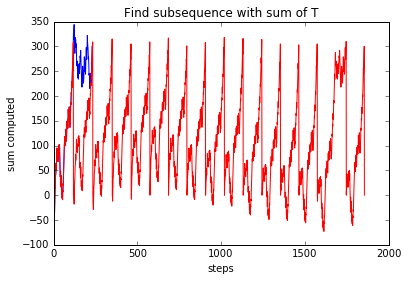

In [460]:
pylab.plot([sum for i, j, sum in log], '', color='blue')
pylab.xlabel('steps')
pylab.ylabel('sum computed')
pylab.title('Find subsequence with sum of T')
pylab.plot([sum for i, j, sum in log2], '', color='red')
#pylab.legend(['steps'], [''])

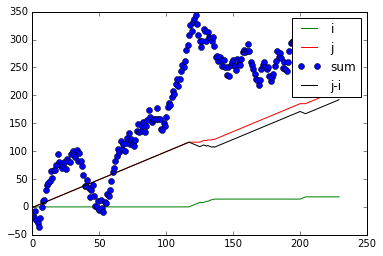

In [461]:
pylab.plot([i for i, j, sum in log], '', color='green', label='i')
pylab.plot([j for i, j, sum in log], '', color='red', label='j')
pylab.plot([sum for i, j, sum in log], 'o', color='blue', label='sum')
pylab.plot([(j-i) for i, j, sum in log], '', color='black', label='j-i')
pylab.legend()

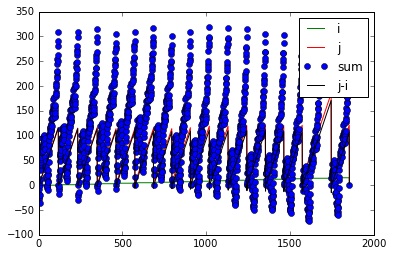

In [462]:
pylab.plot([i for i, j, sum in log2], '', color='green', label='i')
pylab.plot([j for i, j, sum in log2], '', color='red', label='j')
pylab.plot([sum for i, j, sum in log2], 'o', color='blue', label='sum')
pylab.plot([(j-i) for i, j, sum in log2], '', color='black', label='j-i')
pylab.legend()

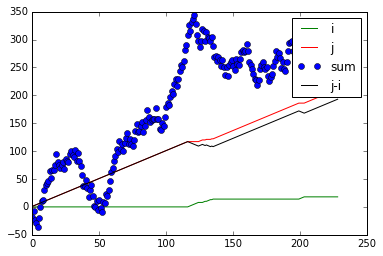

In [463]:
pylab.plot([i for i, j, sum in log3], '', color='green', label='i')
pylab.plot([j for i, j, sum in log3], '', color='red', label='j')
pylab.plot([sum for i, j, sum in log3], 'o', color='blue', label='sum')
pylab.plot([(j-i) for i, j, sum in log3], '', color='black', label='j-i')
pylab.legend()